In [53]:
# !pip install  yfinance 

# Problem statement
We will take the GOOGLE stocks price from 2012 and till now and predict the trend of the stocks.

In [54]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

# For reading stock data from yahoo
#from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime
tech_list = ['GOOG']

# Set up End and Start times for data grab
tech_list = ['GOOG']

end = datetime.now()
# start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, '2012-01-01', end)

[*********************100%***********************]  1 of 1 completed


In [55]:
GOOG = GOOG.drop(['Adj Close'],axis=1)
GOOG

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,233776981
...,...,...,...,...,...
2022-12-29,87.029999,89.364998,86.989998,88.949997,18280700
2022-12-30,87.364998,88.830002,87.029999,88.730003,19179300
2023-01-03,89.830002,91.550003,89.019997,89.699997,20738500


Splitting train and test set 

In [79]:
train = GOOG.iloc[:-600,:]
test = GOOG.iloc[-600:,:]

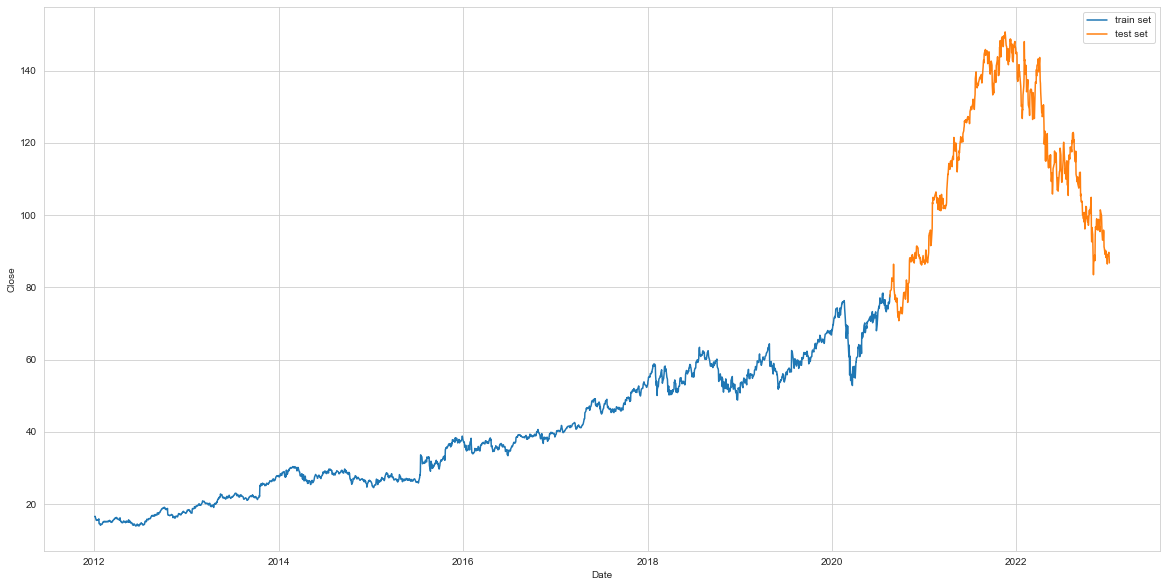

In [80]:
plt.figure(figsize=(20,10))
plt.plot(train.iloc[:,3],label = 'train set')
plt.plot(test.iloc[:,3],label = 'test set')
plt.xlabel("Date")
plt.ylabel("Close")
plt.legend()
plt.show()

# Feature scaling

In [81]:
from sklearn.preprocessing import MinMaxScaler
sc  = MinMaxScaler()
train = sc.fit_transform(train)
test = sc.transform(test)

In [82]:
# taking the reference of past 60 days of data to predict the future stock price.
# It is observed that taking 60 days of past data gives us best results.
# In this data set 60 days of data means 3 months of data.
# Every month as 20 days of Stock price.
# X train will have data of 60 days prior to our date and y train will have data of one day after our date
def data(a,b,c):
    a = []
    b = []
    for i in range(60, len(c)):
        a.append(train[i-60: i, 0])
        b.append(train[i, 0])

    a, b = np.array(a), np.array(b)
    
    return a,b

<!-- taking the reference of past 60 days of data to predict the future stock price.
It is observed that taking 60 days of past data gives us best results.
In this data set 60 days of data means 3 months of data.
Every month as 20 days of Stock price.
X train will have data of 60 days prior to our date and y train will have data of one day after our date -->

In [83]:
X_train =[]
y_train = []
X_train,y_train= data(X_train,y_train,train)

X_test =[]
y_test = []
X_test,y_test= data(X_test,y_test,test)

In [84]:
#Reshape
X_train = np.reshape(X_train, newshape = 
                     (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, newshape = 
                     (X_test.shape[0], X_test.shape[1], 1))
X_train.shape

(2111, 60, 1)

# Creating model and fitting the model

In [85]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

model = Sequential()
##add 1nd lstm layer: 50 neurons
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(rate = 0.2))

##add 2nd lstm layer: 50 neurons
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(rate = 0.2))

##add 3rd lstm layer
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(rate = 0.2))

##add 4th lstm layer
model.add(LSTM(units = 50, return_sequences = False))
model.add(Dropout(rate = 0.2))

##add output layer
model.add(Dense(units = 1))

In [86]:
#model compile
model.compile(optimizer= 'adam',loss = 'mean_squared_error')

#fitting the model
model.fit(x = X_train,y=y_train,batch_size=32,epochs=15)

Epoch 1/15
66/66 [==============================] - 9s 60ms/step - loss: 0.0173
Epoch 2/15
66/66 [==============================] - 4s 59ms/step - loss: 0.0037
Epoch 3/15
66/66 [==============================] - 4s 59ms/step - loss: 0.0030
Epoch 4/15
66/66 [==============================] - 4s 55ms/step - loss: 0.0031
Epoch 5/15
66/66 [==============================] - 4s 55ms/step - loss: 0.0031
Epoch 6/15
66/66 [==============================] - 4s 60ms/step - loss: 0.0030
Epoch 7/15
66/66 [==============================] - 4s 68ms/step - loss: 0.0028
Epoch 8/15
66/66 [==============================] - 6s 88ms/step - loss: 0.0028
Epoch 9/15
66/66 [==============================] - 5s 74ms/step - loss: 0.0025
Epoch 10/15
66/66 [==============================] - 4s 60ms/step - loss: 0.0025
Epoch 11/15
66/66 [==============================] - 4s 58ms/step - loss: 0.0020
Epoch 12/15
66/66 [==============================] - 4s 59ms/step - loss: 0.0025
Epoch 13/15
66/66 [==================

# Evaluating

In [87]:
y_pre = model.predict(X_test)

17/17 [==============================] - 1s 21ms/step


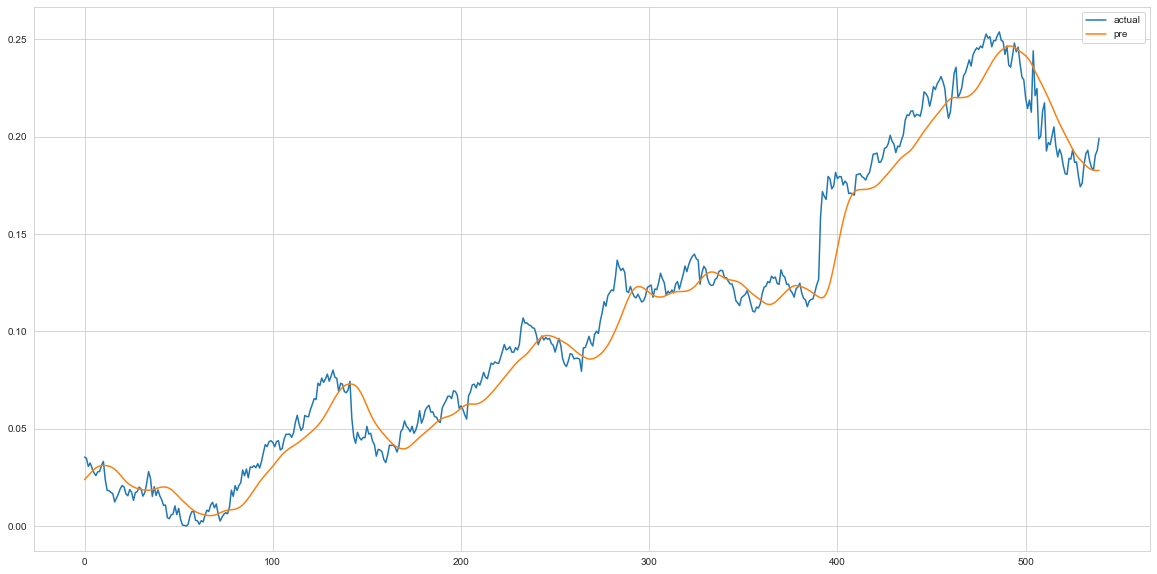

In [88]:
plt.figure(figsize=(20,10))
plt.plot(y_test,label = 'actual')
plt.plot(y_pre,label = 'pre')
plt.legend()
plt.show()

In [89]:
from sklearn.metrics import mean_squared_error,r2_score
print("The RMSE score of the test set",np.sqrt(mean_squared_error(y_test,y_pre)))
print("The r_2 score of the test set",r2_score(y_test,y_pre))

The RMSE score of the test set 0.013050259003942875
The r_2 score of the test set 0.9668483455218105
